# Using Bikes to Predict the Weather

### Statistical Inference study on Weather Conditions Collected from a Bike Sharing Service

##### Authors: Alex Bastin, Amy Zhong, Naaimur Reza & Jeffrey Gao

### Introduction

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

The dataset contains the weather and season information for Capital bikeshare system between years 2011 and 2012. Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position.



### Preliminary Results

In [145]:
# First, we will load required packages
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(dplyr)
library(datateachr)
require(gridExtra)

# Then, set the seed
# set.seed(1)

#### I. loads data from the original source on the web

In [146]:
# URL
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"

# Download the dataset from the web
destfile <- "data/localfile.zip"
download.file(url, destfile)

# Unzip the file
unzip("data/localfile.zip", exdir = "data/")          

#### II. Clean and wrangle data into a tidy format

In [198]:
# Convert from csv to a dataframe
weather_data <- read.csv("data/day.csv")

# Clean up and wrangle
weather_data$weathersit <- as_factor(weather_data$weathersit)
weather_data$season <- as_factor(weather_data$season)
levels(weather_data$season) <- c("Winter","Spring","Summer","Fall")
levels(weather_data$weathersit) <- c("Clear","Cloudy","Light Rain","Heavy Rain")

head(weather_data)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<fct>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,Winter,0,1,0,6,0,Cloudy,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2,2011-01-02,Winter,0,1,0,0,0,Cloudy,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,3,2011-01-03,Winter,0,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,4,2011-01-04,Winter,0,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,5,2011-01-05,Winter,0,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,6,2011-01-06,Winter,0,1,0,4,1,Clear,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [148]:
# Filter and select
seasons <- weather_data %>%
        select(season, weathersit) %>%
        filter(season %in% c("Fall", "Summer"))

sample_proportion <- seasons %>%
        group_by(season) %>%
        summarize(prop = sum(weathersit == "Clear")/n())
    
sample_proportion

season,prop
<fct>,<dbl>
Summer,0.7234043
Fall,0.5786517


#### IV. Plots

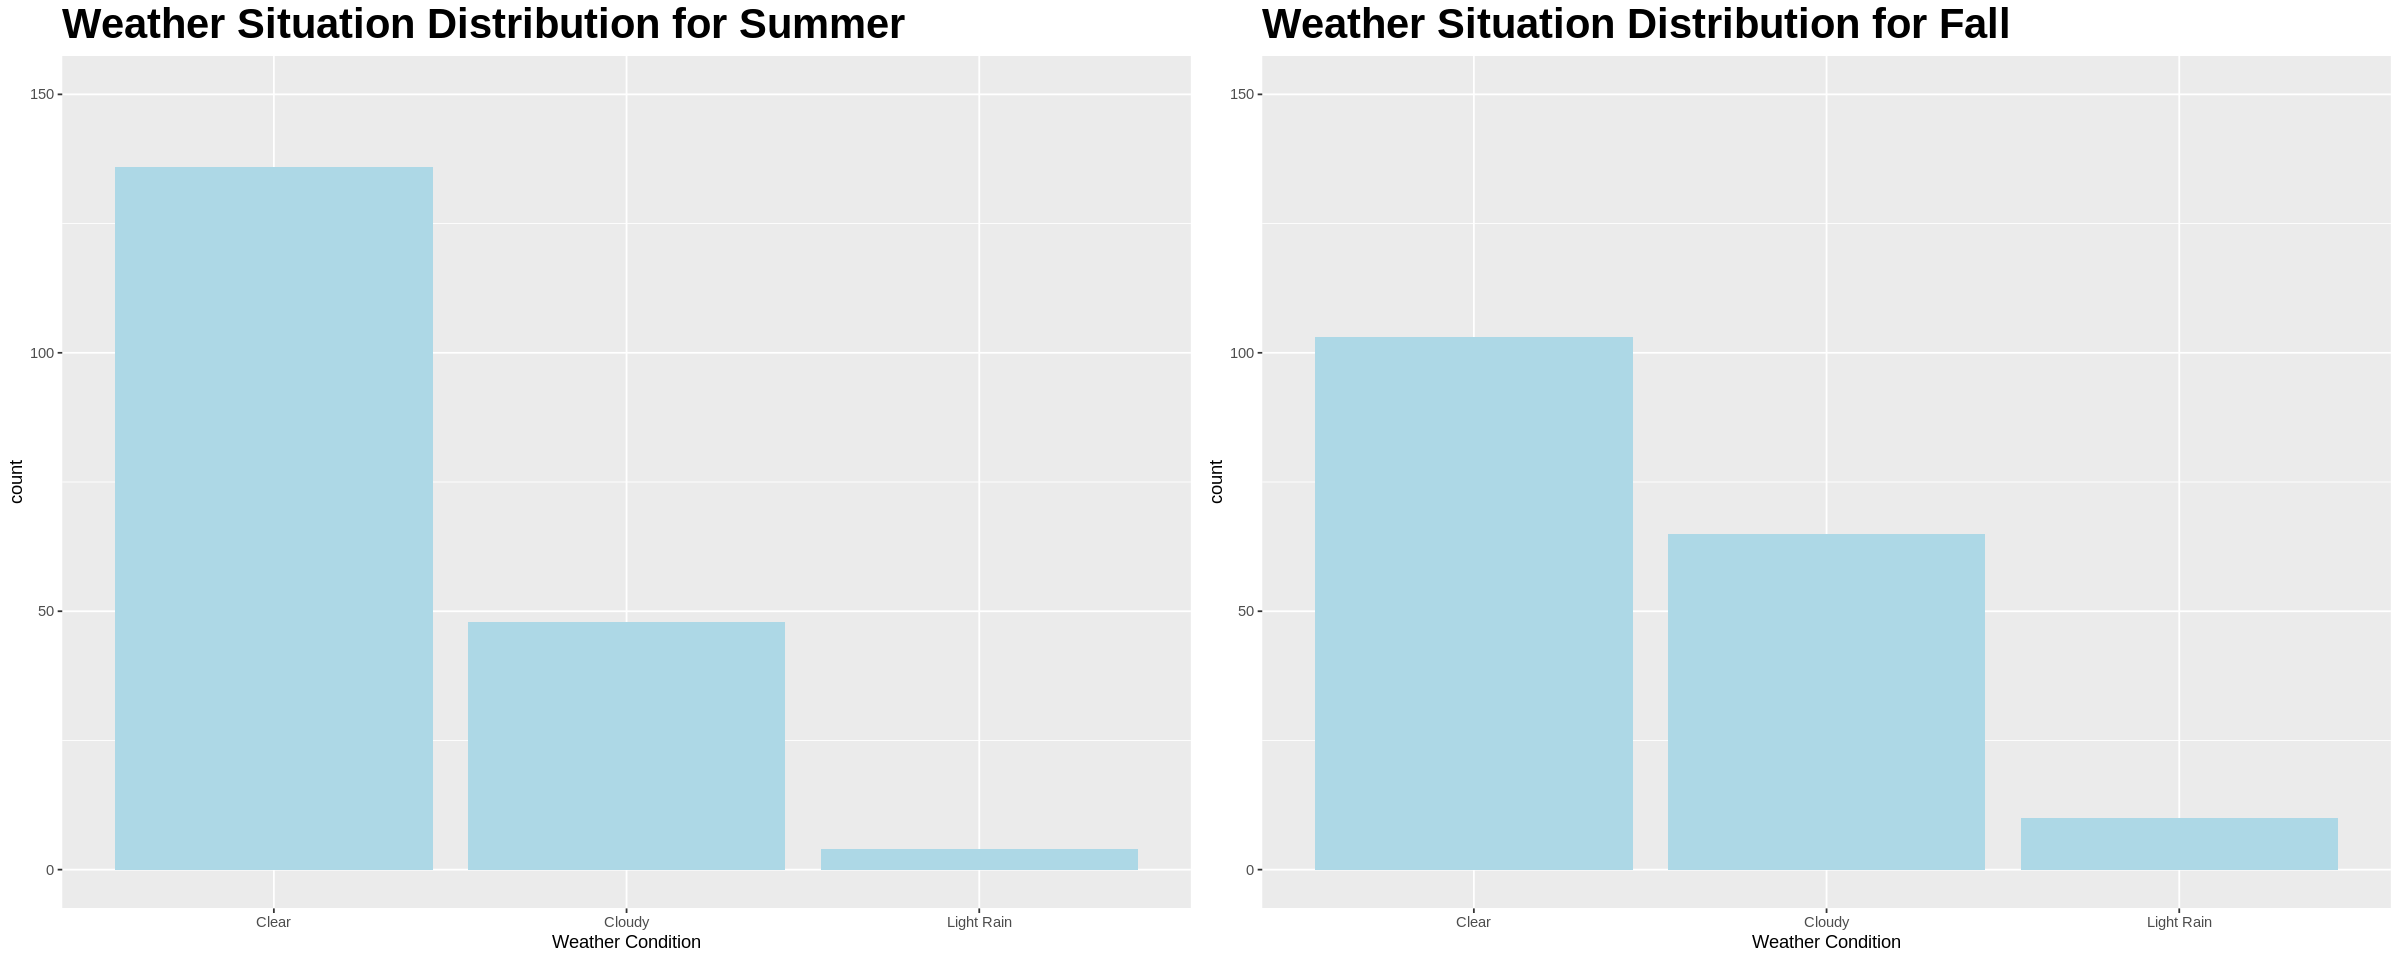

In [152]:
options(repr.plot.width = 20, repr.plot.height = 8)

# Distribution of raw data 

plot_winter <- seasons %>%
        filter(season == "Summer") %>%
        ggplot(aes(x = weathersit))+
        geom_bar(stat = "count", fill = "lightblue")+
        labs(x = "Weather Condition")+
        ggtitle("Weather Situation Distribution for Summer") +
        theme(plot.title = element_text(size = 25, face = "bold")) +
        scale_y_continuous(limits = c(0, 150))

plot_spring <- seasons %>%
        filter(season == "Fall") %>%
        ggplot(aes(x = weathersit))+
        geom_bar(stat = "count", fill = "lightblue")+
        labs(x = "Weather Condition")+
        ggtitle("Weather Situation Distribution for Fall") +
        theme(plot.title = element_text(size = 25, face = "bold")) +
        scale_y_continuous(limits = c(0, 150))

grid.arrange(plot_winter, plot_spring, ncol=2)


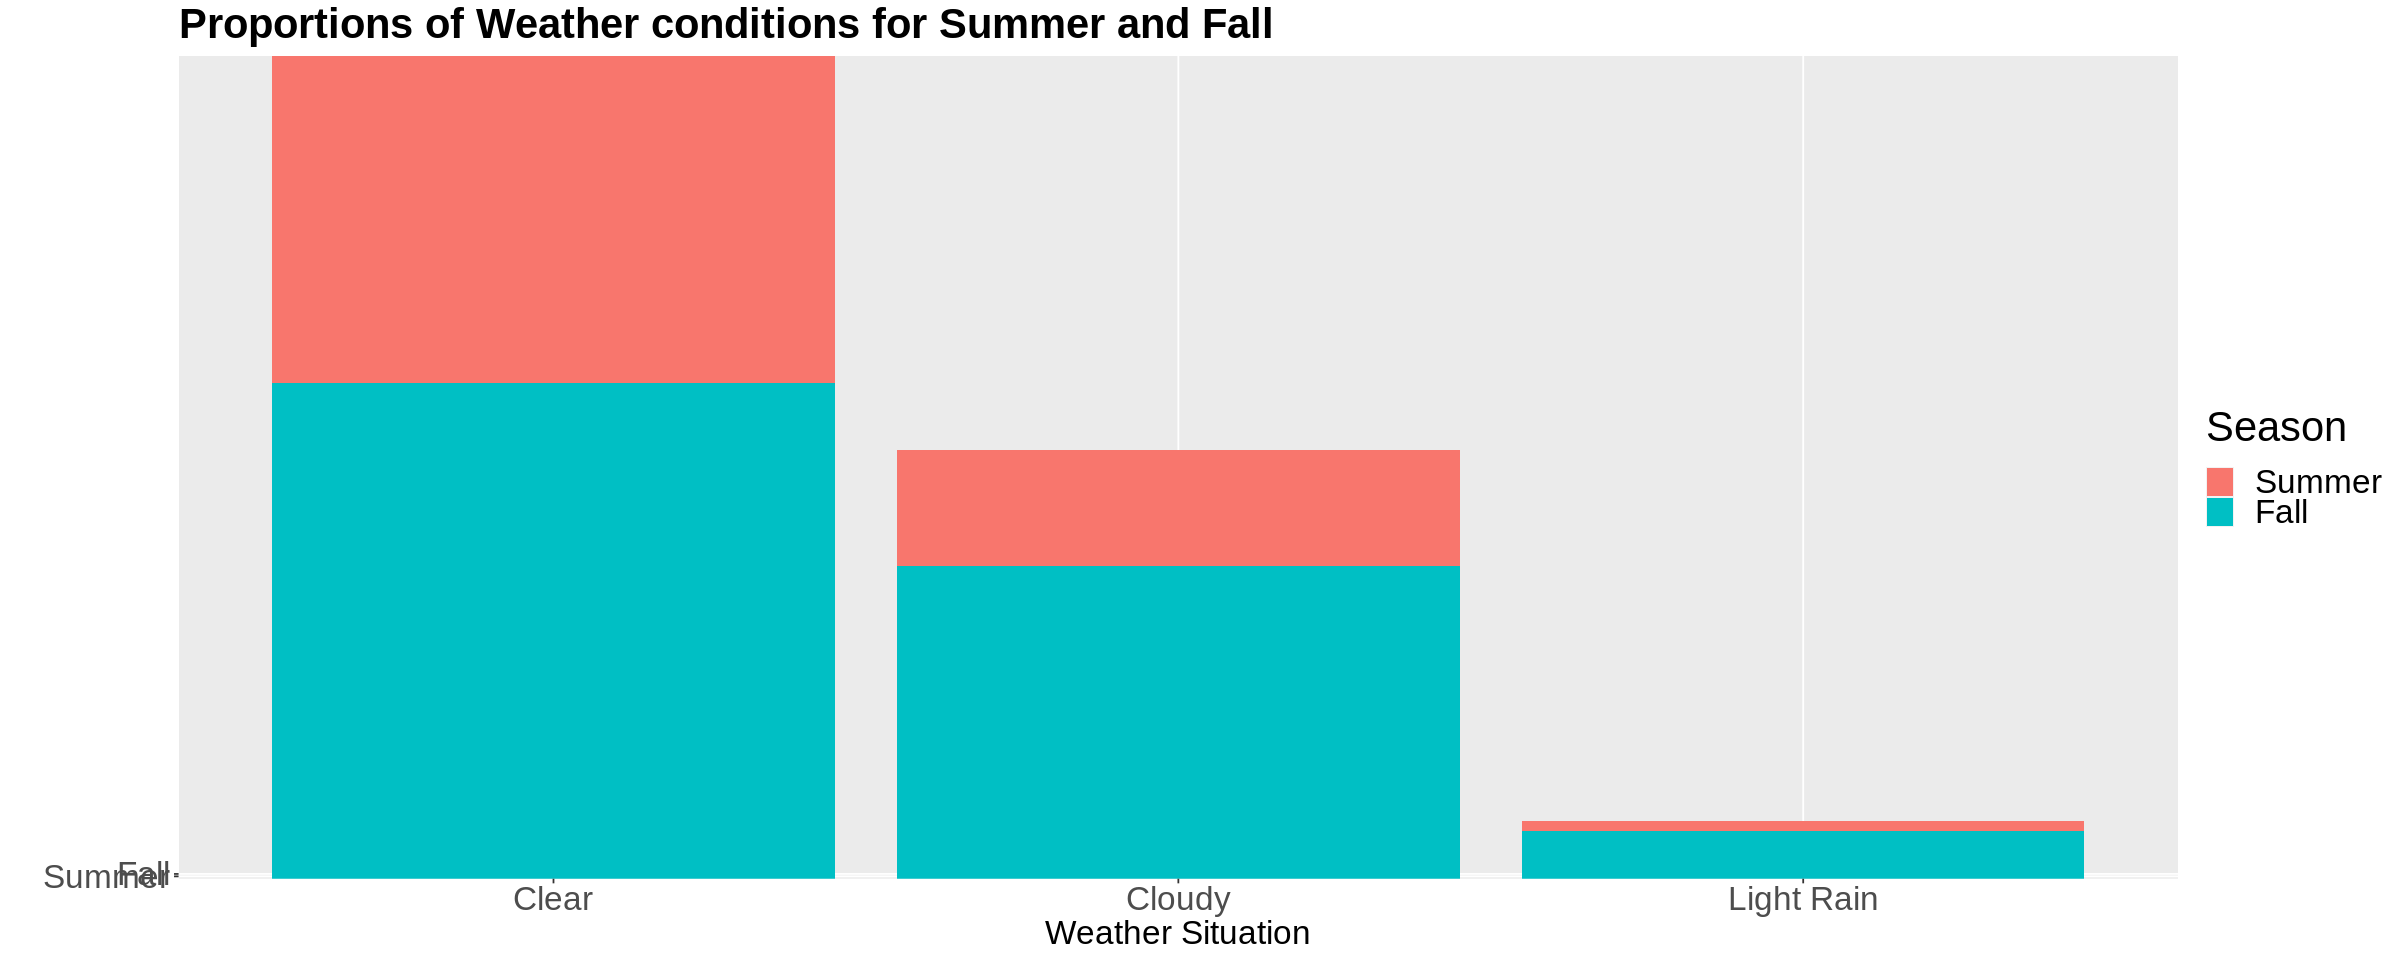

In [151]:
# Distribution of proportion of raw data

proportion_plot <- seasons %>%
        ggplot()+
        geom_bar(aes(x = weathersit, y = season, fill = season),stat = "identity")+
        labs(x = "Weather Situation", y = " ",fill = "Season")+
        ggtitle("Proportions of Weather conditions for Summer and Fall") +
        theme(plot.title = element_text(size = 25, face = "bold"), axis.title=element_text(size=20), text = element_text(size=25))

proportion_plot

#### V. Compute estimates

In [200]:
# Computing proportion estimates for 2000 bootstrap samples

bootstrap_sample_prop <- seasons %>%
        rep_sample_n(size = nrow(weather_data),reps = 2000, replace = TRUE) %>%
        group_by(season) %>% 
        summarize(x = sum(weathersit == "Clear"),
              n = n()) %>% 
        mutate(sample_proportion_clear = x / n) %>%
        select(-x, -n)

bootstrap_sample_prop


season,sample_proportion_clear
<fct>,<dbl>
Summer,0.7234132
Fall,0.5786401


### Methods: Plan

The sample size used for our plots and estimates was large enough to produce close to accurate results. The use of bootstrap sampling has made it easier to derive the estimates for the proportions for each weather condition without having to use the entire sample or having the need to collect more weather data.Even though the results produced are good estimates they are not enough to prove or provide anything substantial. Calculating the 90% confidence interval for the average proportions of each weather condition will provide a range within which there would be a 90% chance of having the true proportions. Furthermore, conducting a hypothesis test 

We expect to find estimates for the proportion of each weather condition in spring and winter and their respective 90% confidence intervals. Conduct hypothesis tests to find out if there are significant differences between the proportions of weather conditions for each season.

Eventually we want to be able to predict with confidence how the weather will behave given the day of the year. This will make weather forecasting easier and will reduce cost in meteorological studies. The decision to use the bike is often made, or even has to be made, the day before the actual trip. Consequently, it is reasonable to assume that weather forecasts significantly affect bike ridership. 

Future question that might come up due to our study include: 
1. How does the weather of one region of the world compare to another?  
2. How consistent in the weather throughout the seasons?
3. How has the climate of the world changed over time?

### References

Hadi Fanaee-T, Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto 

<em>"Using weather forecast to forecast whether bikes are used"<em> by Jan Wessel

<em>"The AI forecaster: Machine learning takes on weather prediction"<em> by Aaron Sidder, American Geophysical Union